# 1. Setup Mario

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 2. Preprocess Environment

In [3]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [4]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

In [5]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [6]:
state = env.reset()

In [7]:
state.shape

(1, 240, 256, 4)

In [8]:
state, reward, done, info = env.step([5])

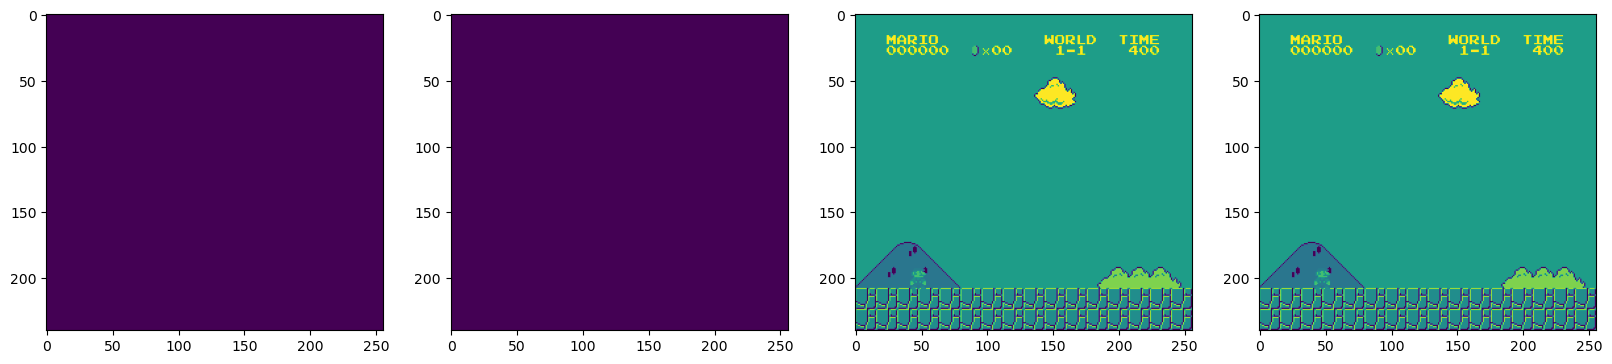

In [9]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [10]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [11]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [15]:
CHECKPOINT_DIR = '/'
LOG_DIR = './logs/'

In [16]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [ ]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, learning_rate=0.000001, 
            n_steps=512) 

# Train it for 10000 timesteps
model.learn(total_timesteps=30000000)
model.save('thisisatestmodel')

Using cpu device
Wrapping the env in a VecTransposeImage.
----------------------------
| time/              |     |
|    fps             | 112 |
|    iterations      | 1   |
|    time_elapsed    | 4   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 26            |
|    iterations           | 2             |
|    time_elapsed         | 38            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.8297927e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00745       |
|    learning_rate        | 1e-06         |
|    loss                 | 106           |
|    n_updates            | 10            |
|    policy_gradient_loss | -4.34e-05     |
|    value_loss           | 271    

-------------------------------------------
| time/                   |               |
|    fps                  | 16            |
|    iterations           | 13            |
|    time_elapsed         | 412           |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 1.7952989e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00778      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0629        |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000262     |
|    value_loss           | 0.195         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 16            |
|    iterations           | 14            |
|    time_elapsed         | 444 

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 24            |
|    time_elapsed         | 1678          |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 1.0835007e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0171        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.208         |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000124     |
|    value_loss           | 0.491         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 25            |
|    time_elapsed         | 1715

-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 35            |
|    time_elapsed         | 2075          |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 6.5029715e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.00774       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0958        |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.00054      |
|    value_loss           | 0.485         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 36            |
|    time_elapsed         | 2107

-------------------------------------------
| time/                   |               |
|    fps                  | 9             |
|    iterations           | 46            |
|    time_elapsed         | 2431          |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 0.00011719938 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.00491       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0834        |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.000788     |
|    value_loss           | 0.137         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 9             |
|    iterations           | 47            |
|    time_elapsed         | 2463

-------------------------------------------
| time/                   |               |
|    fps                  | 10            |
|    iterations           | 57            |
|    time_elapsed         | 2785          |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 2.6938273e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | 0.123         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0461        |
|    n_updates            | 560           |
|    policy_gradient_loss | -4e-05        |
|    value_loss           | 0.329         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 10           |
|    iterations           | 58           |
|    time_elapsed         | 2818    

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 68            |
|    time_elapsed         | 3140          |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 0.00010596891 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.00379       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.139         |
|    n_updates            | 670           |
|    policy_gradient_loss | -0.000776     |
|    value_loss           | 0.739         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 69            |
|    time_elapsed         | 3173

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 79            |
|    time_elapsed         | 3500          |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 1.1958298e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.204         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0712        |
|    n_updates            | 780           |
|    policy_gradient_loss | -4.95e-05     |
|    value_loss           | 0.225         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 80            |
|    time_elapsed         | 3533

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 90            |
|    time_elapsed         | 3868          |
|    total_timesteps      | 46080         |
| train/                  |               |
|    approx_kl            | 2.0248815e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.00724       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.129         |
|    n_updates            | 890           |
|    policy_gradient_loss | 0.000224      |
|    value_loss           | 0.701         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 91            |
|    time_elapsed         | 3903

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 101           |
|    time_elapsed         | 4247          |
|    total_timesteps      | 51712         |
| train/                  |               |
|    approx_kl            | 0.00014353602 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.224         |
|    learning_rate        | 1e-06         |
|    loss                 | 44.5          |
|    n_updates            | 1000          |
|    policy_gradient_loss | -7.51e-05     |
|    value_loss           | 94            |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 102           |
|    time_elapsed         | 4279

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 112           |
|    time_elapsed         | 4601          |
|    total_timesteps      | 57344         |
| train/                  |               |
|    approx_kl            | 0.00013501896 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.00943       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.063         |
|    n_updates            | 1110          |
|    policy_gradient_loss | -0.000512     |
|    value_loss           | 0.454         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 113           |
|    time_elapsed         | 4634

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 123           |
|    time_elapsed         | 4954          |
|    total_timesteps      | 62976         |
| train/                  |               |
|    approx_kl            | 1.9359519e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | 0.358         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.976         |
|    n_updates            | 1220          |
|    policy_gradient_loss | -0.000199     |
|    value_loss           | 1.7           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 124          |
|    time_elapsed         | 4987    

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 134          |
|    time_elapsed         | 5308         |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0001893458 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | 0.318        |
|    learning_rate        | 1e-06        |
|    loss                 | 53.5         |
|    n_updates            | 1330         |
|    policy_gradient_loss | 0.000504     |
|    value_loss           | 106          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 135           |
|    time_elapsed         | 5340          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 145          |
|    time_elapsed         | 5669         |
|    total_timesteps      | 74240        |
| train/                  |              |
|    approx_kl            | 0.0001876197 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.82        |
|    explained_variance   | 0.0478       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.108        |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.000702    |
|    value_loss           | 1.26         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 146           |
|    time_elapsed         | 5702          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 156           |
|    time_elapsed         | 6030          |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 0.00042842317 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.8          |
|    explained_variance   | -0.0322       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0636        |
|    n_updates            | 1550          |
|    policy_gradient_loss | -0.00184      |
|    value_loss           | 0.124         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 157          |
|    time_elapsed         | 6063    

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 167           |
|    time_elapsed         | 6388          |
|    total_timesteps      | 85504         |
| train/                  |               |
|    approx_kl            | 0.00023740612 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.79         |
|    explained_variance   | -0.0414       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0705        |
|    n_updates            | 1660          |
|    policy_gradient_loss | -0.000932     |
|    value_loss           | 0.363         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 168           |
|    time_elapsed         | 6421

------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 178          |
|    time_elapsed         | 6747         |
|    total_timesteps      | 91136        |
| train/                  |              |
|    approx_kl            | 0.0005206873 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | -0.0524      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0499       |
|    n_updates            | 1770         |
|    policy_gradient_loss | -0.00201     |
|    value_loss           | 0.326        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 179           |
|    time_elapsed         | 6780          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 189          |
|    time_elapsed         | 7105         |
|    total_timesteps      | 96768        |
| train/                  |              |
|    approx_kl            | 0.0019814912 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | 0.44         |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 1880         |
|    policy_gradient_loss | 0.00227      |
|    value_loss           | 352          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 190           |
|    time_elapsed         | 7137          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 200           |
|    time_elapsed         | 7469          |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00014627608 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.64         |
|    explained_variance   | -0.0582       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0611        |
|    n_updates            | 1990          |
|    policy_gradient_loss | -0.000462     |
|    value_loss           | 0.153         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 201          |
|    time_elapsed         | 7502    

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 211           |
|    time_elapsed         | 7829          |
|    total_timesteps      | 108032        |
| train/                  |               |
|    approx_kl            | 0.00047408254 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.63         |
|    explained_variance   | -0.029        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0832        |
|    n_updates            | 2100          |
|    policy_gradient_loss | -0.00109      |
|    value_loss           | 0.409         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 212           |
|    time_elapsed         | 7861

----------------------------------------
| time/                   |            |
|    fps                  | 13         |
|    iterations           | 222        |
|    time_elapsed         | 8188       |
|    total_timesteps      | 113664     |
| train/                  |            |
|    approx_kl            | 0.00154462 |
|    clip_fraction        | 0.00215    |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.53      |
|    explained_variance   | 0.508      |
|    learning_rate        | 1e-06      |
|    loss                 | 101        |
|    n_updates            | 2210       |
|    policy_gradient_loss | -0.00209   |
|    value_loss           | 273        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 223          |
|    time_elapsed         | 8221         |
|    total_timesteps      | 114176       |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 233           |
|    time_elapsed         | 8548          |
|    total_timesteps      | 119296        |
| train/                  |               |
|    approx_kl            | 0.00052006764 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.6          |
|    explained_variance   | -0.117        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0618        |
|    n_updates            | 2320          |
|    policy_gradient_loss | -0.00143      |
|    value_loss           | 0.173         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 234           |
|    time_elapsed         | 8581

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 244           |
|    time_elapsed         | 8907          |
|    total_timesteps      | 124928        |
| train/                  |               |
|    approx_kl            | 0.00015012524 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.63         |
|    explained_variance   | -0.0307       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.112         |
|    n_updates            | 2430          |
|    policy_gradient_loss | -0.000329     |
|    value_loss           | 0.919         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 245          |
|    time_elapsed         | 8939    

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 255           |
|    time_elapsed         | 9270          |
|    total_timesteps      | 130560        |
| train/                  |               |
|    approx_kl            | 0.00029119663 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.59         |
|    explained_variance   | -0.0765       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.267         |
|    n_updates            | 2540          |
|    policy_gradient_loss | -0.000593     |
|    value_loss           | 1.46          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 256           |
|    time_elapsed         | 9303

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 266           |
|    time_elapsed         | 9627          |
|    total_timesteps      | 136192        |
| train/                  |               |
|    approx_kl            | 0.00051882875 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.6          |
|    explained_variance   | 0.26          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0426        |
|    n_updates            | 2650          |
|    policy_gradient_loss | -0.00143      |
|    value_loss           | 0.209         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 267           |
|    time_elapsed         | 9659

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 277           |
|    time_elapsed         | 9985          |
|    total_timesteps      | 141824        |
| train/                  |               |
|    approx_kl            | 0.00032829586 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.59         |
|    explained_variance   | -0.0354       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.199         |
|    n_updates            | 2760          |
|    policy_gradient_loss | -0.000913     |
|    value_loss           | 1.49          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 278           |
|    time_elapsed         | 1001

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 288          |
|    time_elapsed         | 10344        |
|    total_timesteps      | 147456       |
| train/                  |              |
|    approx_kl            | 0.0013177425 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.58        |
|    explained_variance   | 0.556        |
|    learning_rate        | 1e-06        |
|    loss                 | 207          |
|    n_updates            | 2870         |
|    policy_gradient_loss | 0.000845     |
|    value_loss           | 513          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 289           |
|    time_elapsed         | 10377         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 299           |
|    time_elapsed         | 10712         |
|    total_timesteps      | 153088        |
| train/                  |               |
|    approx_kl            | 0.00057034637 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.51         |
|    explained_variance   | -0.00983      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0481        |
|    n_updates            | 2980          |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 0.101         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 300           |
|    time_elapsed         | 1074

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 310           |
|    time_elapsed         | 11074         |
|    total_timesteps      | 158720        |
| train/                  |               |
|    approx_kl            | 0.00014541193 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.55         |
|    explained_variance   | 0.039         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.142         |
|    n_updates            | 3090          |
|    policy_gradient_loss | -0.000509     |
|    value_loss           | 0.481         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 311           |
|    time_elapsed         | 1110

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 321           |
|    time_elapsed         | 11434         |
|    total_timesteps      | 164352        |
| train/                  |               |
|    approx_kl            | 0.00038464216 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.53         |
|    explained_variance   | -0.0793       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.196         |
|    n_updates            | 3200          |
|    policy_gradient_loss | -0.000887     |
|    value_loss           | 2.6           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 322          |
|    time_elapsed         | 11466   

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 332          |
|    time_elapsed         | 11792        |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 0.0026970815 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.46        |
|    explained_variance   | 0.186        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0364       |
|    n_updates            | 3310         |
|    policy_gradient_loss | -0.00528     |
|    value_loss           | 0.101        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 333           |
|    time_elapsed         | 11826         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 343           |
|    time_elapsed         | 12152         |
|    total_timesteps      | 175616        |
| train/                  |               |
|    approx_kl            | 0.00013105746 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.4          |
|    explained_variance   | 0.168         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.219         |
|    n_updates            | 3420          |
|    policy_gradient_loss | -0.000193     |
|    value_loss           | 1.27          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 344          |
|    time_elapsed         | 12185   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 354           |
|    time_elapsed         | 12513         |
|    total_timesteps      | 181248        |
| train/                  |               |
|    approx_kl            | 0.00032718328 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | 0.823         |
|    learning_rate        | 1e-06         |
|    loss                 | 53.8          |
|    n_updates            | 3530          |
|    policy_gradient_loss | -4.64e-06     |
|    value_loss           | 126           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 355           |
|    time_elapsed         | 1254

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 365          |
|    time_elapsed         | 12878        |
|    total_timesteps      | 186880       |
| train/                  |              |
|    approx_kl            | 0.0011505776 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.25        |
|    explained_variance   | 0.155        |
|    learning_rate        | 1e-06        |
|    loss                 | 283          |
|    n_updates            | 3640         |
|    policy_gradient_loss | 0.00115      |
|    value_loss           | 517          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 366           |
|    time_elapsed         | 12910         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 376          |
|    time_elapsed         | 13238        |
|    total_timesteps      | 192512       |
| train/                  |              |
|    approx_kl            | 0.0004360244 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.999       |
|    explained_variance   | -0.167       |
|    learning_rate        | 1e-06        |
|    loss                 | 373          |
|    n_updates            | 3750         |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 717          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 377          |
|    time_elapsed         | 13272        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 387          |
|    time_elapsed         | 13599        |
|    total_timesteps      | 198144       |
| train/                  |              |
|    approx_kl            | 3.736175e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.972       |
|    explained_variance   | -0.129       |
|    learning_rate        | 1e-06        |
|    loss                 | 619          |
|    n_updates            | 3860         |
|    policy_gradient_loss | 0.000572     |
|    value_loss           | 763          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 388         |
|    time_elapsed         | 13632       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 398          |
|    time_elapsed         | 13962        |
|    total_timesteps      | 203776       |
| train/                  |              |
|    approx_kl            | 0.0040401723 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.943       |
|    explained_variance   | 0.706        |
|    learning_rate        | 1e-06        |
|    loss                 | 152          |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.00313     |
|    value_loss           | 261          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 399           |
|    time_elapsed         | 13996         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 409         |
|    time_elapsed         | 14324       |
|    total_timesteps      | 209408      |
| train/                  |             |
|    approx_kl            | 0.001612275 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.913      |
|    explained_variance   | 0.204       |
|    learning_rate        | 1e-06       |
|    loss                 | 593         |
|    n_updates            | 4080        |
|    policy_gradient_loss | -0.0013     |
|    value_loss           | 801         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 410           |
|    time_elapsed         | 14357         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 420          |
|    time_elapsed         | 14690        |
|    total_timesteps      | 215040       |
| train/                  |              |
|    approx_kl            | 0.0007349292 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.887       |
|    explained_variance   | -0.132       |
|    learning_rate        | 1e-06        |
|    loss                 | 59.8         |
|    n_updates            | 4190         |
|    policy_gradient_loss | 0.000522     |
|    value_loss           | 201          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 421          |
|    time_elapsed         | 14723        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 431          |
|    time_elapsed         | 15055        |
|    total_timesteps      | 220672       |
| train/                  |              |
|    approx_kl            | 0.0005891725 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.887       |
|    explained_variance   | 0.151        |
|    learning_rate        | 1e-06        |
|    loss                 | 661          |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.000116    |
|    value_loss           | 895          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 432          |
|    time_elapsed         | 15088        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 442          |
|    time_elapsed         | 15415        |
|    total_timesteps      | 226304       |
| train/                  |              |
|    approx_kl            | 0.0008408957 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.75        |
|    explained_variance   | 0.286        |
|    learning_rate        | 1e-06        |
|    loss                 | 89.7         |
|    n_updates            | 4410         |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 209          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 443         |
|    time_elapsed         | 15447       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 453           |
|    time_elapsed         | 15775         |
|    total_timesteps      | 231936        |
| train/                  |               |
|    approx_kl            | 0.00031513604 |
|    clip_fraction        | 0.00547       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.06         |
|    explained_variance   | 0.937         |
|    learning_rate        | 1e-06         |
|    loss                 | 22.6          |
|    n_updates            | 4520          |
|    policy_gradient_loss | 0.00213       |
|    value_loss           | 97.8          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 454          |
|    time_elapsed         | 15808   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 464           |
|    time_elapsed         | 16136         |
|    total_timesteps      | 237568        |
| train/                  |               |
|    approx_kl            | 0.00034495757 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.02         |
|    explained_variance   | 0.39          |
|    learning_rate        | 1e-06         |
|    loss                 | 382           |
|    n_updates            | 4630          |
|    policy_gradient_loss | 0.00049       |
|    value_loss           | 601           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 465          |
|    time_elapsed         | 16169   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 475           |
|    time_elapsed         | 16501         |
|    total_timesteps      | 243200        |
| train/                  |               |
|    approx_kl            | 0.00044888898 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.01         |
|    explained_variance   | 0.626         |
|    learning_rate        | 1e-06         |
|    loss                 | 117           |
|    n_updates            | 4740          |
|    policy_gradient_loss | -0.000458     |
|    value_loss           | 277           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 476           |
|    time_elapsed         | 1653

-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 486         |
|    time_elapsed         | 16860       |
|    total_timesteps      | 248832      |
| train/                  |             |
|    approx_kl            | 0.008679807 |
|    clip_fraction        | 0.00566     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.86       |
|    explained_variance   | 0.811       |
|    learning_rate        | 1e-06       |
|    loss                 | 111         |
|    n_updates            | 4850        |
|    policy_gradient_loss | -0.00545    |
|    value_loss           | 221         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 487           |
|    time_elapsed         | 16893         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 497          |
|    time_elapsed         | 17220        |
|    total_timesteps      | 254464       |
| train/                  |              |
|    approx_kl            | 0.0030219709 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.855       |
|    explained_variance   | 0.595        |
|    learning_rate        | 1e-06        |
|    loss                 | 567          |
|    n_updates            | 4960         |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 759          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 498          |
|    time_elapsed         | 17253        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 508          |
|    time_elapsed         | 17581        |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0026119193 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.911       |
|    explained_variance   | 0.565        |
|    learning_rate        | 1e-06        |
|    loss                 | 108          |
|    n_updates            | 5070         |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 244          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 509           |
|    time_elapsed         | 17614         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 519          |
|    time_elapsed         | 17943        |
|    total_timesteps      | 265728       |
| train/                  |              |
|    approx_kl            | 0.0016490119 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.919       |
|    explained_variance   | 0.304        |
|    learning_rate        | 1e-06        |
|    loss                 | 339          |
|    n_updates            | 5180         |
|    policy_gradient_loss | -0.00155     |
|    value_loss           | 669          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 520           |
|    time_elapsed         | 17976         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 530          |
|    time_elapsed         | 18307        |
|    total_timesteps      | 271360       |
| train/                  |              |
|    approx_kl            | 0.0010558404 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.972       |
|    explained_variance   | 0.405        |
|    learning_rate        | 1e-06        |
|    loss                 | 118          |
|    n_updates            | 5290         |
|    policy_gradient_loss | -0.000247    |
|    value_loss           | 252          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 531          |
|    time_elapsed         | 18340        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 541         |
|    time_elapsed         | 18667       |
|    total_timesteps      | 276992      |
| train/                  |             |
|    approx_kl            | 0.001911925 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.977      |
|    explained_variance   | 0.599       |
|    learning_rate        | 1e-06       |
|    loss                 | 108         |
|    n_updates            | 5400        |
|    policy_gradient_loss | -0.000848   |
|    value_loss           | 253         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 542           |
|    time_elapsed         | 18700         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 552           |
|    time_elapsed         | 19030         |
|    total_timesteps      | 282624        |
| train/                  |               |
|    approx_kl            | 0.00015193305 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.893        |
|    explained_variance   | 0.498         |
|    learning_rate        | 1e-06         |
|    loss                 | 182           |
|    n_updates            | 5510          |
|    policy_gradient_loss | -0.000546     |
|    value_loss           | 689           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 553          |
|    time_elapsed         | 19064   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 563           |
|    time_elapsed         | 19395         |
|    total_timesteps      | 288256        |
| train/                  |               |
|    approx_kl            | 0.00038276042 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.864        |
|    explained_variance   | 0.635         |
|    learning_rate        | 1e-06         |
|    loss                 | 46.6          |
|    n_updates            | 5620          |
|    policy_gradient_loss | -0.000776     |
|    value_loss           | 134           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 564           |
|    time_elapsed         | 1942

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 574           |
|    time_elapsed         | 19761         |
|    total_timesteps      | 293888        |
| train/                  |               |
|    approx_kl            | 0.00061987934 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.81         |
|    explained_variance   | 0.496         |
|    learning_rate        | 1e-06         |
|    loss                 | 347           |
|    n_updates            | 5730          |
|    policy_gradient_loss | -0.00064      |
|    value_loss           | 543           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 575          |
|    time_elapsed         | 19794   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 585           |
|    time_elapsed         | 20129         |
|    total_timesteps      | 299520        |
| train/                  |               |
|    approx_kl            | 0.00092669274 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.832        |
|    explained_variance   | 0.625         |
|    learning_rate        | 1e-06         |
|    loss                 | 215           |
|    n_updates            | 5840          |
|    policy_gradient_loss | -0.00127      |
|    value_loss           | 448           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 586          |
|    time_elapsed         | 20162   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 596           |
|    time_elapsed         | 20495         |
|    total_timesteps      | 305152        |
| train/                  |               |
|    approx_kl            | 0.00032847002 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.16         |
|    explained_variance   | 0.908         |
|    learning_rate        | 1e-06         |
|    loss                 | 79.4          |
|    n_updates            | 5950          |
|    policy_gradient_loss | -0.000505     |
|    value_loss           | 144           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 597          |
|    time_elapsed         | 20528   

-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 607         |
|    time_elapsed         | 20860       |
|    total_timesteps      | 310784      |
| train/                  |             |
|    approx_kl            | 0.002006249 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.608       |
|    learning_rate        | 1e-06       |
|    loss                 | 338         |
|    n_updates            | 6060        |
|    policy_gradient_loss | -0.0018     |
|    value_loss           | 492         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 608         |
|    time_elapsed         | 20893       |
|    total_timesteps      | 311296

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 618          |
|    time_elapsed         | 21226        |
|    total_timesteps      | 316416       |
| train/                  |              |
|    approx_kl            | 0.0016329468 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | 0.558        |
|    learning_rate        | 1e-06        |
|    loss                 | 647          |
|    n_updates            | 6170         |
|    policy_gradient_loss | -0.00076     |
|    value_loss           | 712          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 619         |
|    time_elapsed         | 21259       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 629           |
|    time_elapsed         | 21590         |
|    total_timesteps      | 322048        |
| train/                  |               |
|    approx_kl            | 0.00087993743 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.855        |
|    explained_variance   | 0.842         |
|    learning_rate        | 1e-06         |
|    loss                 | 74.2          |
|    n_updates            | 6280          |
|    policy_gradient_loss | -2.72e-05     |
|    value_loss           | 179           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 630          |
|    time_elapsed         | 21624   

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 640          |
|    time_elapsed         | 21957        |
|    total_timesteps      | 327680       |
| train/                  |              |
|    approx_kl            | 0.0014936368 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.821       |
|    explained_variance   | 0.891        |
|    learning_rate        | 1e-06        |
|    loss                 | 120          |
|    n_updates            | 6390         |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 272          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 641          |
|    time_elapsed         | 21990        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 651          |
|    time_elapsed         | 22317        |
|    total_timesteps      | 333312       |
| train/                  |              |
|    approx_kl            | 0.0007204929 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.76        |
|    explained_variance   | 0.79         |
|    learning_rate        | 1e-06        |
|    loss                 | 142          |
|    n_updates            | 6500         |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 294          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 652           |
|    time_elapsed         | 22349         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 662           |
|    time_elapsed         | 22679         |
|    total_timesteps      | 338944        |
| train/                  |               |
|    approx_kl            | 0.00022351625 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.802        |
|    explained_variance   | 0.194         |
|    learning_rate        | 1e-06         |
|    loss                 | 321           |
|    n_updates            | 6610          |
|    policy_gradient_loss | 0.00045       |
|    value_loss           | 1.29e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 663          |
|    time_elapsed         | 22712   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 673           |
|    time_elapsed         | 23047         |
|    total_timesteps      | 344576        |
| train/                  |               |
|    approx_kl            | 0.00038401608 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.588        |
|    explained_variance   | 0.47          |
|    learning_rate        | 1e-06         |
|    loss                 | 462           |
|    n_updates            | 6720          |
|    policy_gradient_loss | -0.000487     |
|    value_loss           | 849           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 674           |
|    time_elapsed         | 2307

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 684           |
|    time_elapsed         | 23406         |
|    total_timesteps      | 350208        |
| train/                  |               |
|    approx_kl            | 0.00055813114 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.596        |
|    explained_variance   | 0.675         |
|    learning_rate        | 1e-06         |
|    loss                 | 109           |
|    n_updates            | 6830          |
|    policy_gradient_loss | -0.000204     |
|    value_loss           | 390           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 685          |
|    time_elapsed         | 23439   

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 695           |
|    time_elapsed         | 23769         |
|    total_timesteps      | 355840        |
| train/                  |               |
|    approx_kl            | 0.00027271023 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.583        |
|    explained_variance   | 0.594         |
|    learning_rate        | 1e-06         |
|    loss                 | 165           |
|    n_updates            | 6940          |
|    policy_gradient_loss | -0.000349     |
|    value_loss           | 303           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 696          |
|    time_elapsed         | 23802   

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 706          |
|    time_elapsed         | 24128        |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 0.0016889452 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.657       |
|    explained_variance   | 0.699        |
|    learning_rate        | 1e-06        |
|    loss                 | 202          |
|    n_updates            | 7050         |
|    policy_gradient_loss | -0.00252     |
|    value_loss           | 386          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 707          |
|    time_elapsed         | 24161        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 717          |
|    time_elapsed         | 24488        |
|    total_timesteps      | 367104       |
| train/                  |              |
|    approx_kl            | 0.0024209595 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.798       |
|    explained_variance   | 0.871        |
|    learning_rate        | 1e-06        |
|    loss                 | 95.8         |
|    n_updates            | 7160         |
|    policy_gradient_loss | -0.00396     |
|    value_loss           | 197          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 718          |
|    time_elapsed         | 24521        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 14            |
|    iterations           | 728           |
|    time_elapsed         | 24850         |
|    total_timesteps      | 372736        |
| train/                  |               |
|    approx_kl            | 0.00017714628 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.476        |
|    explained_variance   | 0.726         |
|    learning_rate        | 1e-06         |
|    loss                 | 49.7          |
|    n_updates            | 7270          |
|    policy_gradient_loss | -0.000453     |
|    value_loss           | 121           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 729          |
|    time_elapsed         | 24883   

-----------------------------------------
| time/                   |             |
|    fps                  | 15          |
|    iterations           | 739         |
|    time_elapsed         | 25211       |
|    total_timesteps      | 378368      |
| train/                  |             |
|    approx_kl            | 0.001680187 |
|    clip_fraction        | 0.000781    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.65       |
|    explained_variance   | 0.872       |
|    learning_rate        | 1e-06       |
|    loss                 | 149         |
|    n_updates            | 7380        |
|    policy_gradient_loss | -0.00315    |
|    value_loss           | 296         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 740           |
|    time_elapsed         | 25243         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 750          |
|    time_elapsed         | 25575        |
|    total_timesteps      | 384000       |
| train/                  |              |
|    approx_kl            | 0.0011881603 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.638       |
|    explained_variance   | 0.892        |
|    learning_rate        | 1e-06        |
|    loss                 | 65           |
|    n_updates            | 7490         |
|    policy_gradient_loss | -0.00256     |
|    value_loss           | 229          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 751           |
|    time_elapsed         | 25608         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 761          |
|    time_elapsed         | 25935        |
|    total_timesteps      | 389632       |
| train/                  |              |
|    approx_kl            | 0.0016418021 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.965       |
|    explained_variance   | 0.97         |
|    learning_rate        | 1e-06        |
|    loss                 | 16.1         |
|    n_updates            | 7600         |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 46.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 762          |
|    time_elapsed         | 25968        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 772           |
|    time_elapsed         | 26297         |
|    total_timesteps      | 395264        |
| train/                  |               |
|    approx_kl            | 0.00028736005 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.72         |
|    explained_variance   | 0.581         |
|    learning_rate        | 1e-06         |
|    loss                 | 474           |
|    n_updates            | 7710          |
|    policy_gradient_loss | -3.94e-05     |
|    value_loss           | 798           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 773          |
|    time_elapsed         | 26330   

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 783           |
|    time_elapsed         | 26661         |
|    total_timesteps      | 400896        |
| train/                  |               |
|    approx_kl            | 0.00035389687 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.565        |
|    explained_variance   | 0.751         |
|    learning_rate        | 1e-06         |
|    loss                 | 118           |
|    n_updates            | 7820          |
|    policy_gradient_loss | -0.000671     |
|    value_loss           | 314           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 784          |
|    time_elapsed         | 26694   

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 794           |
|    time_elapsed         | 27022         |
|    total_timesteps      | 406528        |
| train/                  |               |
|    approx_kl            | 0.00030012266 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.589        |
|    explained_variance   | 0.852         |
|    learning_rate        | 1e-06         |
|    loss                 | 137           |
|    n_updates            | 7930          |
|    policy_gradient_loss | -0.000866     |
|    value_loss           | 339           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 795          |
|    time_elapsed         | 27054   

-----------------------------------------
| time/                   |             |
|    fps                  | 15          |
|    iterations           | 805         |
|    time_elapsed         | 27383       |
|    total_timesteps      | 412160      |
| train/                  |             |
|    approx_kl            | 6.49665e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.504      |
|    explained_variance   | 0.791       |
|    learning_rate        | 1e-06       |
|    loss                 | 637         |
|    n_updates            | 8040        |
|    policy_gradient_loss | -0.000146   |
|    value_loss           | 672         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 806           |
|    time_elapsed         | 27417         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 816           |
|    time_elapsed         | 27742         |
|    total_timesteps      | 417792        |
| train/                  |               |
|    approx_kl            | 0.00016032765 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.293        |
|    explained_variance   | 0.415         |
|    learning_rate        | 1e-06         |
|    loss                 | 705           |
|    n_updates            | 8150          |
|    policy_gradient_loss | -0.000204     |
|    value_loss           | 748           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 817          |
|    time_elapsed         | 27775   

------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 827          |
|    time_elapsed         | 28102        |
|    total_timesteps      | 423424       |
| train/                  |              |
|    approx_kl            | 0.0006899759 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.347       |
|    explained_variance   | 0.56         |
|    learning_rate        | 1e-06        |
|    loss                 | 184          |
|    n_updates            | 8260         |
|    policy_gradient_loss | -0.00252     |
|    value_loss           | 510          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 828          |
|    time_elapsed         | 28135        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 838           |
|    time_elapsed         | 28463         |
|    total_timesteps      | 429056        |
| train/                  |               |
|    approx_kl            | 0.00031101936 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.378        |
|    explained_variance   | 0.908         |
|    learning_rate        | 1e-06         |
|    loss                 | 119           |
|    n_updates            | 8370          |
|    policy_gradient_loss | -0.000263     |
|    value_loss           | 217           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 839           |
|    time_elapsed         | 2849

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 849           |
|    time_elapsed         | 28824         |
|    total_timesteps      | 434688        |
| train/                  |               |
|    approx_kl            | 0.00052603753 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.361        |
|    explained_variance   | 0.784         |
|    learning_rate        | 1e-06         |
|    loss                 | 409           |
|    n_updates            | 8480          |
|    policy_gradient_loss | -0.00071      |
|    value_loss           | 639           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 850          |
|    time_elapsed         | 28857   

-----------------------------------------
| time/                   |             |
|    fps                  | 15          |
|    iterations           | 860         |
|    time_elapsed         | 29189       |
|    total_timesteps      | 440320      |
| train/                  |             |
|    approx_kl            | 0.001386821 |
|    clip_fraction        | 0.00762     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.349      |
|    explained_variance   | 0.824       |
|    learning_rate        | 1e-06       |
|    loss                 | 79.8        |
|    n_updates            | 8590        |
|    policy_gradient_loss | -0.00191    |
|    value_loss           | 159         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 861           |
|    time_elapsed         | 29222         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 871          |
|    time_elapsed         | 29549        |
|    total_timesteps      | 445952       |
| train/                  |              |
|    approx_kl            | 0.0002385577 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.367       |
|    explained_variance   | 0.343        |
|    learning_rate        | 1e-06        |
|    loss                 | 616          |
|    n_updates            | 8700         |
|    policy_gradient_loss | -0.000878    |
|    value_loss           | 945          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 872           |
|    time_elapsed         | 29583         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 882          |
|    time_elapsed         | 29910        |
|    total_timesteps      | 451584       |
| train/                  |              |
|    approx_kl            | 2.373592e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.261       |
|    explained_variance   | 0.868        |
|    learning_rate        | 1e-06        |
|    loss                 | 75.3         |
|    n_updates            | 8810         |
|    policy_gradient_loss | -0.000373    |
|    value_loss           | 315          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 883          |
|    time_elapsed         | 29943        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 893           |
|    time_elapsed         | 30271         |
|    total_timesteps      | 457216        |
| train/                  |               |
|    approx_kl            | 0.00012724963 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.234        |
|    explained_variance   | 0.733         |
|    learning_rate        | 1e-06         |
|    loss                 | 151           |
|    n_updates            | 8920          |
|    policy_gradient_loss | 0.000412      |
|    value_loss           | 362           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 894           |
|    time_elapsed         | 3030

------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 904          |
|    time_elapsed         | 30632        |
|    total_timesteps      | 462848       |
| train/                  |              |
|    approx_kl            | 0.0007100423 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.23        |
|    explained_variance   | 0.689        |
|    learning_rate        | 1e-06        |
|    loss                 | 304          |
|    n_updates            | 9030         |
|    policy_gradient_loss | -0.00137     |
|    value_loss           | 701          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 905           |
|    time_elapsed         | 30666         |
|    t

In [ ]:
model.save('thisisatestmodel')

# 4. Test it Out

In [11]:
# Load model
model = PPO.load('pre-trained-1.zip')

In [12]:
state = env.reset()

In [13]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

ValueError: Error: Unexpected observation shape (1, 240, 256, 4) for Box environment, please use (13, 16, 4) or (n_env, 13, 16, 4) for the observation shape.

In [1]:
from stable_baselines3.common.evaluation import evaluate_policy
import time

evaluate_policy(model, env, n_eval_episodes=1, deterministic=True, render=False, return_episode_rewards=False)
episode = 1

for episode in range(1, episode+1):
    states = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action, _ = model.predict(states, deterministic=True)
        states, reward, done, info = env.step(action)
        score += reward
        time.sleep(0.01)
    print('Episode:{} Score:{}'.format(episode, score))
#env.close()

NameError: name 'model' is not defined